# Part I - Prosper Loan Data Analysis
## by Success Osakioduwamen Obazee

## Introduction

 This dataset contains information on peer to peer loans facilitated by a credit or a loan company called Prosper in the  United States. Prosper makes personal loans easy.


## Preliminary Wrangling

This project is divided into two major parts:

>In the first part, we will conduct an exploratory data analysis on some main feature of the dataset.


>In the second part, we will make use of some findings from the exploration and convey them through an explanatory analysis. 


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('darkgrid')
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
# Load csv into dataframe
df = pd.read_csv('prosperLoanData.csv')

# Let's display the first five rows of the dataframe
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# Let's display information about the original dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
# Visual assessment
df.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
100419,AD0034811927855061408FE,455001,2010-04-20 16:53:53.997000000,NaN,36,Completed,2013-05-10 00:00:00,0.07439,0.0710,0.0610,...,-48.01,0.0,0.00,0.00,0.0,1.0000,0,0,0.0,84
78287,D87A34938064805275502B7,474328,2010-09-03 08:38:22.587000000,NaN,36,Completed,2011-05-24 00:00:00,0.30900,0.2735,0.2635,...,-25.68,0.0,0.00,0.00,0.0,1.0000,0,0,0.0,109
96196,627A3478362089428E35C08,451086,2010-03-20 16:19:37.603000000,NaN,36,Chargedoff,2010-12-08 00:00:00,0.11296,0.0920,0.0820,...,-13.62,0.0,5189.53,5189.53,0.0,1.0000,0,0,0.0,186
102477,274233680891614031495F9,41363,2006-09-22 07:46:50.327000000,E,36,Defaulted,2007-07-02 00:00:00,0.22744,0.2200,0.1900,...,-6.00,0.0,2701.07,2701.08,0.0,1.0000,0,0,0.0,22
37287,D9833549846653003D7C3CF,597147,2012-06-07 09:35:24.663000000,NaN,36,Chargedoff,2014-01-29 00:00:00,0.21372,0.1768,0.1668,...,-43.01,0.0,2902.93,2902.93,0.0,0.8636,0,0,0.0,86
86407,46C53431272539542C71E3E,403124,2008-09-23 15:39:08.240000000,B,36,Completed,2011-10-03 00:00:00,0.16436,0.1500,0.1400,...,-49.58,0.0,0.00,0.00,0.0,1.0000,0,0,0.0,64
95418,B5253592176010107AC5392,960326,2013-10-17 13:59:50.620000000,NaN,36,Current,NaN,0.21699,0.1800,0.1700,...,-31.75,0.0,0.00,0.00,0.0,1.0000,0,0,0.0,81
89537,B79C36011264136098B00CD,1154236,2014-02-11 10:20:51.407000000,NaN,36,Current,NaN,0.19540,0.1585,0.1485,...,0.00,0.0,0.00,0.00,0.0,1.0000,0,0,0.0,1
102330,A8F53591808662255FA459E,1005729,2013-10-26 08:00:28.523000000,NaN,36,Current,NaN,0.23898,0.2015,0.1915,...,-12.76,0.0,0.00,0.00,0.0,1.0000,0,0,0.0,1
85050,EDD8359084989741331DCCA,924490,2013-09-27 07:27:29.330000000,NaN,60,Current,NaN,0.20808,0.1840,0.1740,...,-28.33,0.0,0.00,0.00,0.0,1.0000,0,0,0.0,1


Since our main aim here is Exploratory Data Analysis, so we will merge assessing and cleaning steps into one to make it concise and simple.

## Data Assessing and Cleaning

### Let's Choose Subset of Features of Interest

In [5]:
# Simplify the dataframe to only include relevant columns for this analysis
# Save df into a new variable to keep the original df untouched
loan_df = df[['ListingCreationDate', 'LoanOriginalAmount', 'LoanStatus', 'ListingCategory (numeric)', 'BorrowerState', 'BorrowerAPR','BorrowerRate', 'StatedMonthlyIncome',
             'Term', 'EmploymentStatus', 'MonthlyLoanPayment']]

# High-level overview of data shape and composition
print(loan_df.shape)
print(loan_df.info())

(113937, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
ListingCreationDate          113937 non-null object
LoanOriginalAmount           113937 non-null int64
LoanStatus                   113937 non-null object
ListingCategory (numeric)    113937 non-null int64
BorrowerState                108422 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
StatedMonthlyIncome          113937 non-null float64
Term                         113937 non-null int64
EmploymentStatus             111682 non-null object
MonthlyLoanPayment           113937 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 9.6+ MB
None


In [6]:
# Check the first 5 rows
loan_df.head()

,ListingCreationDate,LoanOriginalAmount,LoanStatus,ListingCategory (numeric),BorrowerState,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term,EmploymentStatus,MonthlyLoanPayment
0,2007-08-26 19:09:29.263000000,9425,Completed,0,CO,0.16516,0.1580,3083.333333,36,Self-employed,330.43
1,2014-02-27 08:28:07.900000000,10000,Current,2,CO,0.12016,0.0920,6125.000000,36,Employed,318.93
2,2007-01-05 15:00:47.090000000,3001,Completed,0,GA,0.28269,0.2750,2083.333333,36,Not available,123.32
3,2012-10-22 11:02:35.010000000,10000,Current,16,GA,0.12528,0.0974,2875.000000,36,Employed,321.45
4,2013-09-14 18:38:39.097000000,15000,Current,2,MN,0.24614,0.2085,9583.333333,36,Employed,563.97


### Let's Drop Duplicated Rows Based on Listing Number

In [7]:
# Drop duplicates in the dataset
loan_df = loan_df.drop_duplicates()

### Convert LoanOriginationDate to datetime datatype and separate date and time

In [8]:
loan_df.ListingCreationDate = pd.to_datetime(loan_df.ListingCreationDate, yearfirst = True)

In [9]:
# Splitting ListingCreationDate column into year,month,day,time
#using the apply function, applying the strftime function to each value of the timestamp column in each row
loan_df['date'] = loan_df['ListingCreationDate'].apply(lambda x: x.strftime('%d-%m-%Y'))
loan_df['time'] = loan_df['ListingCreationDate'].apply(lambda x: x.strftime('%H:%M:%S'))

#changing datatype of the date column to datetime
loan_df.date = pd.to_datetime(loan_df.date, dayfirst = True)

In [10]:
# drop the original ListingCreationDate column
loan_df.drop(columns = ['ListingCreationDate'],inplace = True)

###  Let's convert ListingCategory (numeric) into their names and Rename to ListingCategory

In [11]:
loan_df['ListingCategory (numeric)'] = loan_df['ListingCategory (numeric)'].replace({
    0: 'Not Available',
    1: 'Debt Consolidation',
    2: 'Home Improvement',
    3: 'Business',
    4: 'Personal Loan',
    5: 'Student Use',
    6: 'Auto',
    7: 'Other',
    8: 'Baby&Adoption',
    9: 'Boat',
    10: 'Cosmetic Procedure',
    11: 'Engagement Ring',
    12: 'Green Loans',
    13: 'Household Expenses',
    14: 'Large Purchases',
    15: 'Medical/Dental',
    16: 'Motorcycle',
    17: 'RV',
    18: 'Taxes',
    19: 'Vacation',
    20: 'Wedding Loans'})

loan_df['ListingCategory (numeric)'].dtype

dtype('O')

In [12]:
# Rename the column
loan_df.rename(columns={'ListingCategory (numeric)':'ListingCategory'}, inplace=True)


loan_df['ListingCategory'].dtype

dtype('O')


## Exploratory Data Analysis

In [13]:
#Let's display information about the cleaned dataset
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 12 columns):
LoanOriginalAmount     113066 non-null int64
LoanStatus             113066 non-null object
ListingCategory        113066 non-null object
BorrowerState          107551 non-null object
BorrowerAPR            113041 non-null float64
BorrowerRate           113066 non-null float64
StatedMonthlyIncome    113066 non-null float64
Term                   113066 non-null int64
EmploymentStatus       110811 non-null object
MonthlyLoanPayment     113066 non-null float64
date                   113066 non-null datetime64[ns]
time                   113066 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 11.2+ MB


In [14]:
# Let's check descriptive statistics for numeric variables
loan_df.describe()

,LoanOriginalAmount,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term,MonthlyLoanPayment
count,113066.000000,113041.000000,113066.000000,1.130660e+05,113066.000000,113066.000000
mean,8314.762307,0.218980,0.192946,5.605120e+03,40.800170,271.932742
std,6237.007841,0.080483,0.074917,7.495596e+03,10.421518,192.549979
min,1000.000000,0.006530,0.000000,0.000000e+00,12.000000,0.000000
25%,4000.000000,0.156290,0.134000,3.199396e+03,36.000000,130.950000
50%,6300.000000,0.209840,0.184000,4.666667e+03,36.000000,217.370000
75%,12000.000000,0.283860,0.250600,6.824688e+03,36.000000,370.570000
max,35000.000000,0.512290,0.497500,1.750003e+06,60.000000,2251.510000


In [15]:
# Let's check the first 5 rows
loan_df.head()

,LoanOriginalAmount,LoanStatus,ListingCategory,BorrowerState,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term,EmploymentStatus,MonthlyLoanPayment,date,time
0,9425,Completed,Not Available,CO,0.16516,0.1580,3083.333333,36,Self-employed,330.43,2007-08-26,19:09:29
1,10000,Current,Home Improvement,CO,0.12016,0.0920,6125.000000,36,Employed,318.93,2014-02-27,08:28:07
2,3001,Completed,Not Available,GA,0.28269,0.2750,2083.333333,36,Not available,123.32,2007-01-05,15:00:47
3,10000,Current,Motorcycle,GA,0.12528,0.0974,2875.000000,36,Employed,321.45,2012-10-22,11:02:35
4,15000,Current,Home Improvement,MN,0.24614,0.2085,9583.333333,36,Employed,563.97,2013-09-14,18:38:39


### What is the structure of your dataset?

>   This data set contains 113,937 loans with 81 variables. 
    While I'll be making use of this: Rows =  113,066 and Columns = 12


### What is/are the main feature(s) of interest in your dataset?

> The EmploymentStatus will be analysed with some factors such as the loan status and term. Let's find out the Employment Status of the borrowers

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the Listing Category, borrower's rate and Loan original amount will be the most important features in predicting some various features.

## Univariate Exploration

### Employment Status

In [16]:
loan_df.EmploymentStatus.value_counts()

Employed         66598
Full-time        26354
Self-employed     6052
Not available     5347
Other             3742
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

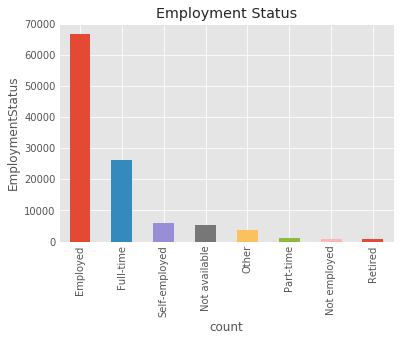

In [17]:
loan_df['EmploymentStatus'].value_counts().plot(kind='bar')
plt.title('Employment Status')
plt.xlabel('count')
plt.ylabel('EmploymentStatus')
plt.fontsize = 12
plt.figsize=(10,10)

The majority of borrowers are currently employed and work full-time..

### Loan Status 

In [18]:
loan_df['LoanStatus'].value_counts()

Current                   55730
Completed                 38061
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

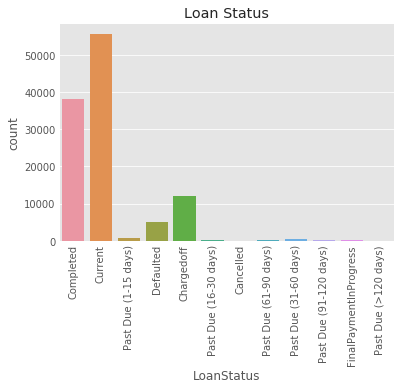

In [19]:
plt.xticks(rotation=90)
sb.countplot(data = loan_df, x = 'LoanStatus');
plt.title('Loan Status');

*  Most of the loans in the data set are current loans

*  Past due loans are split in several groups based on the length of payment delay

### Term

In [20]:
loan_df['Term'].value_counts()

36    87224
60    24228
12     1614
Name: Term, dtype: int64

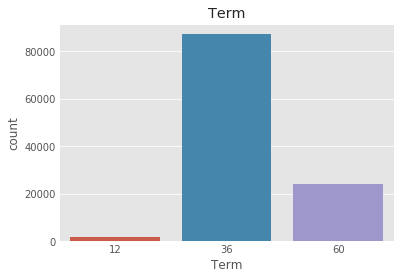

In [21]:
sb.countplot(data = loan_df, x = 'Term');
plt.title('Term');

There are only 3 loan terms, and the majority of loan term is for the 36 months

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
.
> The majority of borrowers are currently employed and work full-time, most of the loans in the data set are actually current loans, while the highest loan term is 36month

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The majority of loans are actually current loans. Since our main goal is to define driving factors of outcome of loan we are not interested in any current loans, so we will adjust it

## Bivariate Exploration

### What is the Relationship Between Loan Status and Loan Amount?

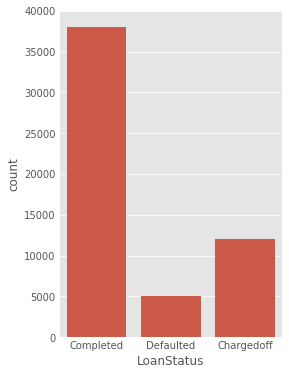

In [22]:
# Let's adjust the form of data first
loan_df = loan_df.query('LoanStatus in ["Defaulted", "Completed", "Chargedoff"]')
plt.figure(figsize=(4, 6));
b_color=sb.color_palette()[0]
sb.countplot(x='LoanStatus', data=loan_df, color=b_color);

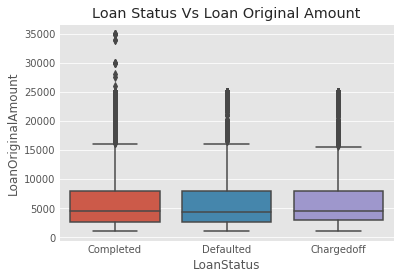

In [23]:
sb.boxplot(data = loan_df, x = 'LoanStatus', y = 'LoanOriginalAmount');
plt.title('Loan Status Vs Loan Original Amount');

*  We can see that the defaulted and chargedoff credits tend to be smaller than completed credits ones.

### What is the Relationship Between Loan Status and Employment Status?

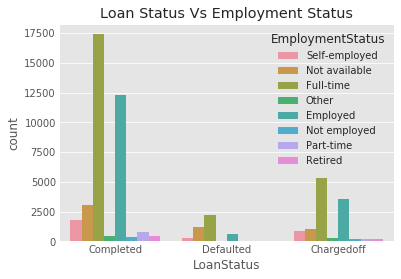

In [24]:
sb.countplot(data = loan_df, x = 'LoanStatus', hue = 'EmploymentStatus')
plt.title('Loan Status Vs Employment Status');

*   We can see that the full time employed borrowers have almost completed their loans

### What is the Relationship Between Employment Status and Term?

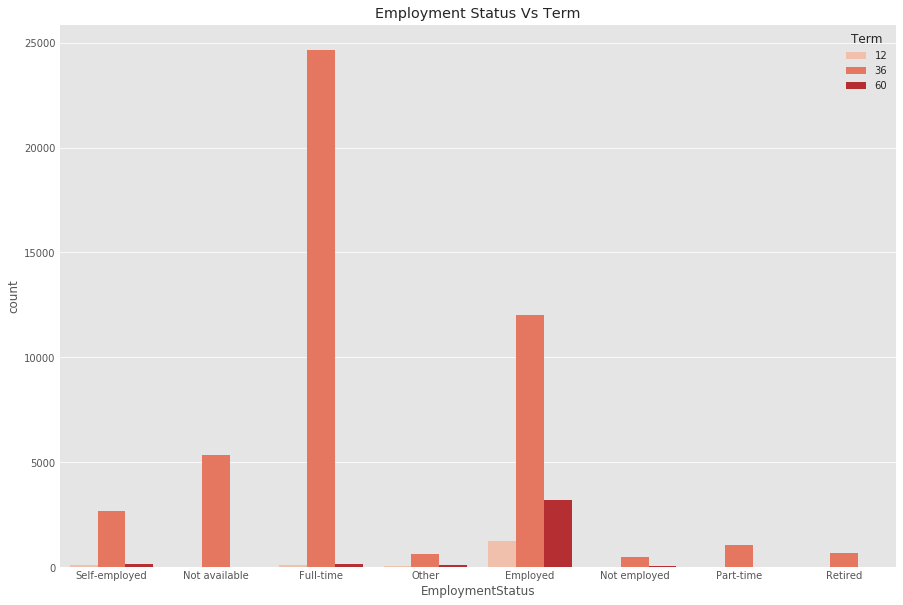

In [25]:
plt.figure(figsize = [15, 10])
sb.countplot(data = loan_df, x = 'EmploymentStatus', hue = 'Term', palette = 'Reds');
plt.title('Employment Status Vs Term');

*   We can see that the Full time employed borrowers have a longer term loan of 36 months

### What is the Relationship Between Employment Status and Listing Category?

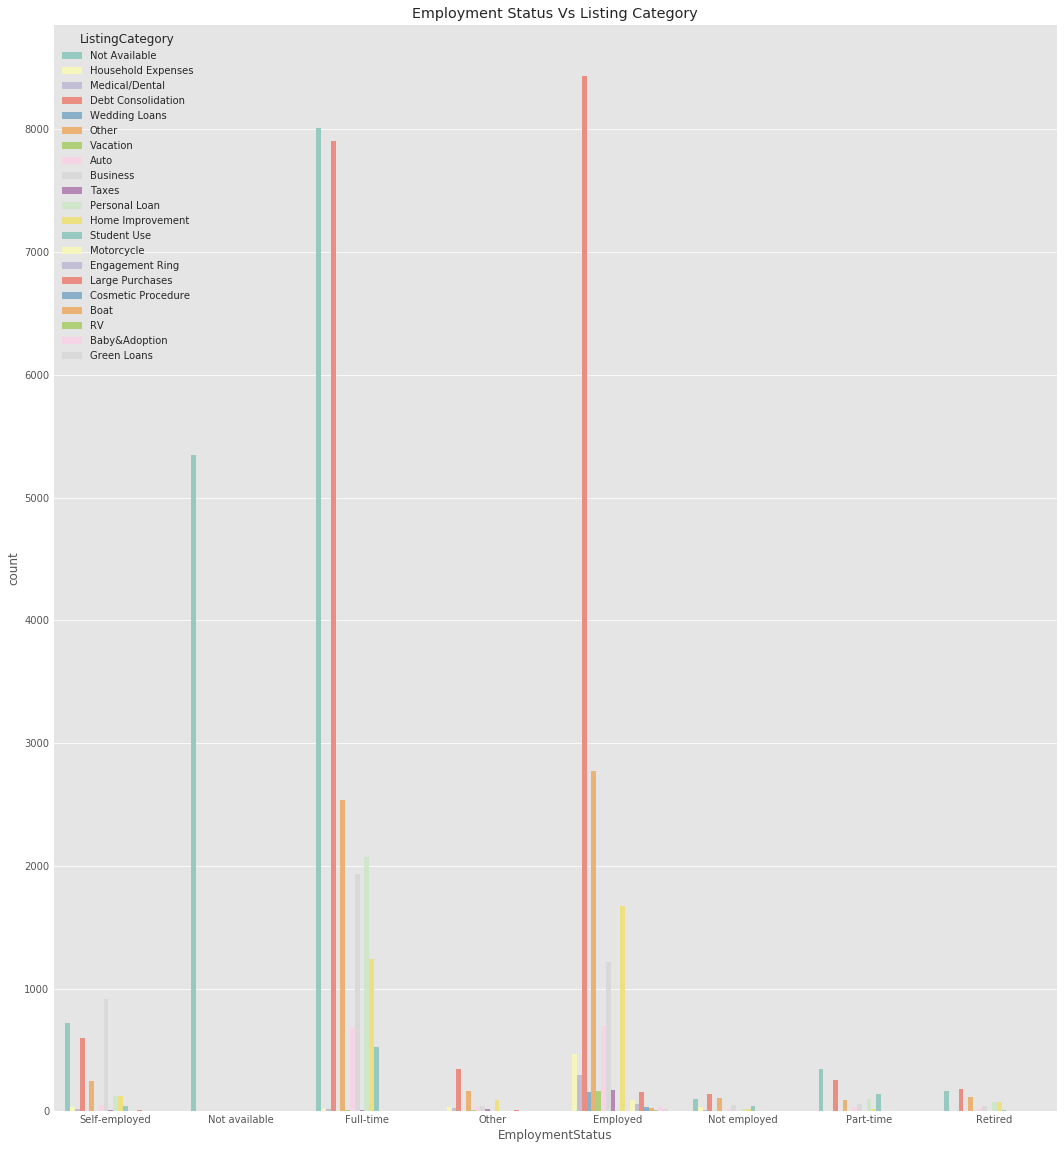

In [26]:
plt.figure(figsize = [18,20])
sb.countplot(data = loan_df, x = 'EmploymentStatus', hue = 'ListingCategory', palette = 'Set3');
plt.title('Employment Status Vs Listing Category');

In [27]:
loan_df.groupby('EmploymentStatus')['ListingCategory'].value_counts()

EmploymentStatus  ListingCategory   
Employed          Debt Consolidation    8436
                  Other                 2773
                  Home Improvement      1669
                  Business              1215
                  Auto                   692
                  Household Expenses     469
                  Medical/Dental         297
                  Taxes                  171
                  Vacation               169
                  Large Purchases        158
                  Wedding Loans          157
                  Motorcycle              89
                  Engagement Ring         57
                  Baby&Adoption           37
                  Cosmetic Procedure      34
                  Boat                    23
                  Green Loans             15
                  RV                      13
                  Not Available            5
Full-time         Not Available         8009
                  Debt Consolidation    7902
                  

Majority of the employed borrowers used their loan for debt consolidation reasons.

### What is the Relationship Between Employment Status and Loan Original Amount?

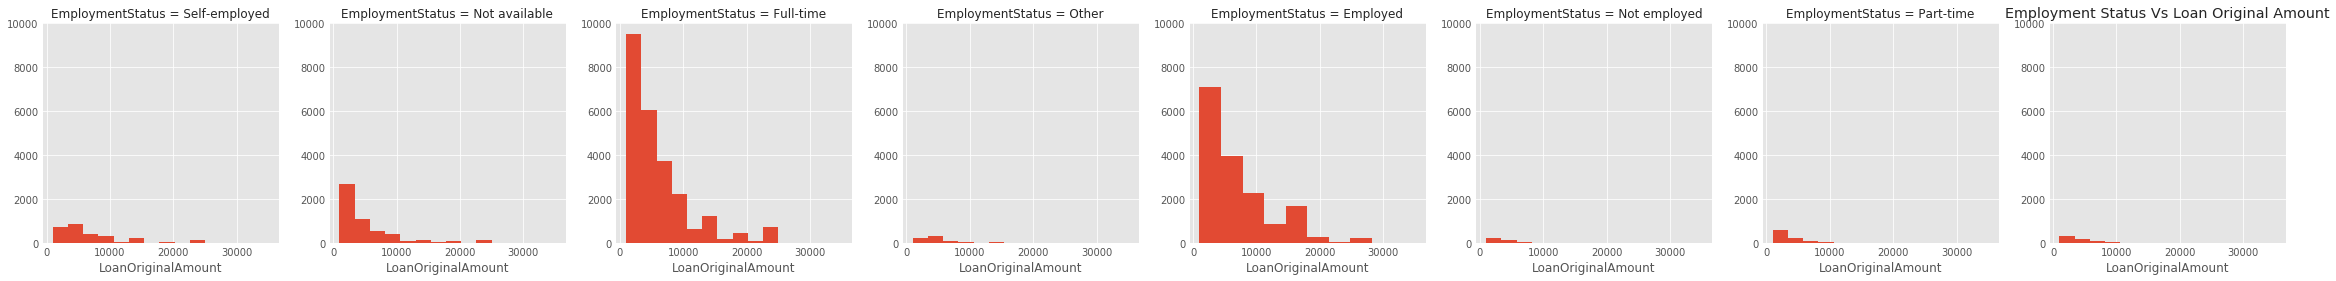

In [28]:
np.linspace(0, 35000, 55)
g=sb.FacetGrid(data=loan_df, col='EmploymentStatus', size=4)
g.map(plt.hist, 'LoanOriginalAmount')
plt.title('Employment Status Vs Loan Original Amount');

This plot tells us that the full time employed borrowers have a higher amount of loan than the others

### What is the Relationship Between Employment Status and Borrower State?

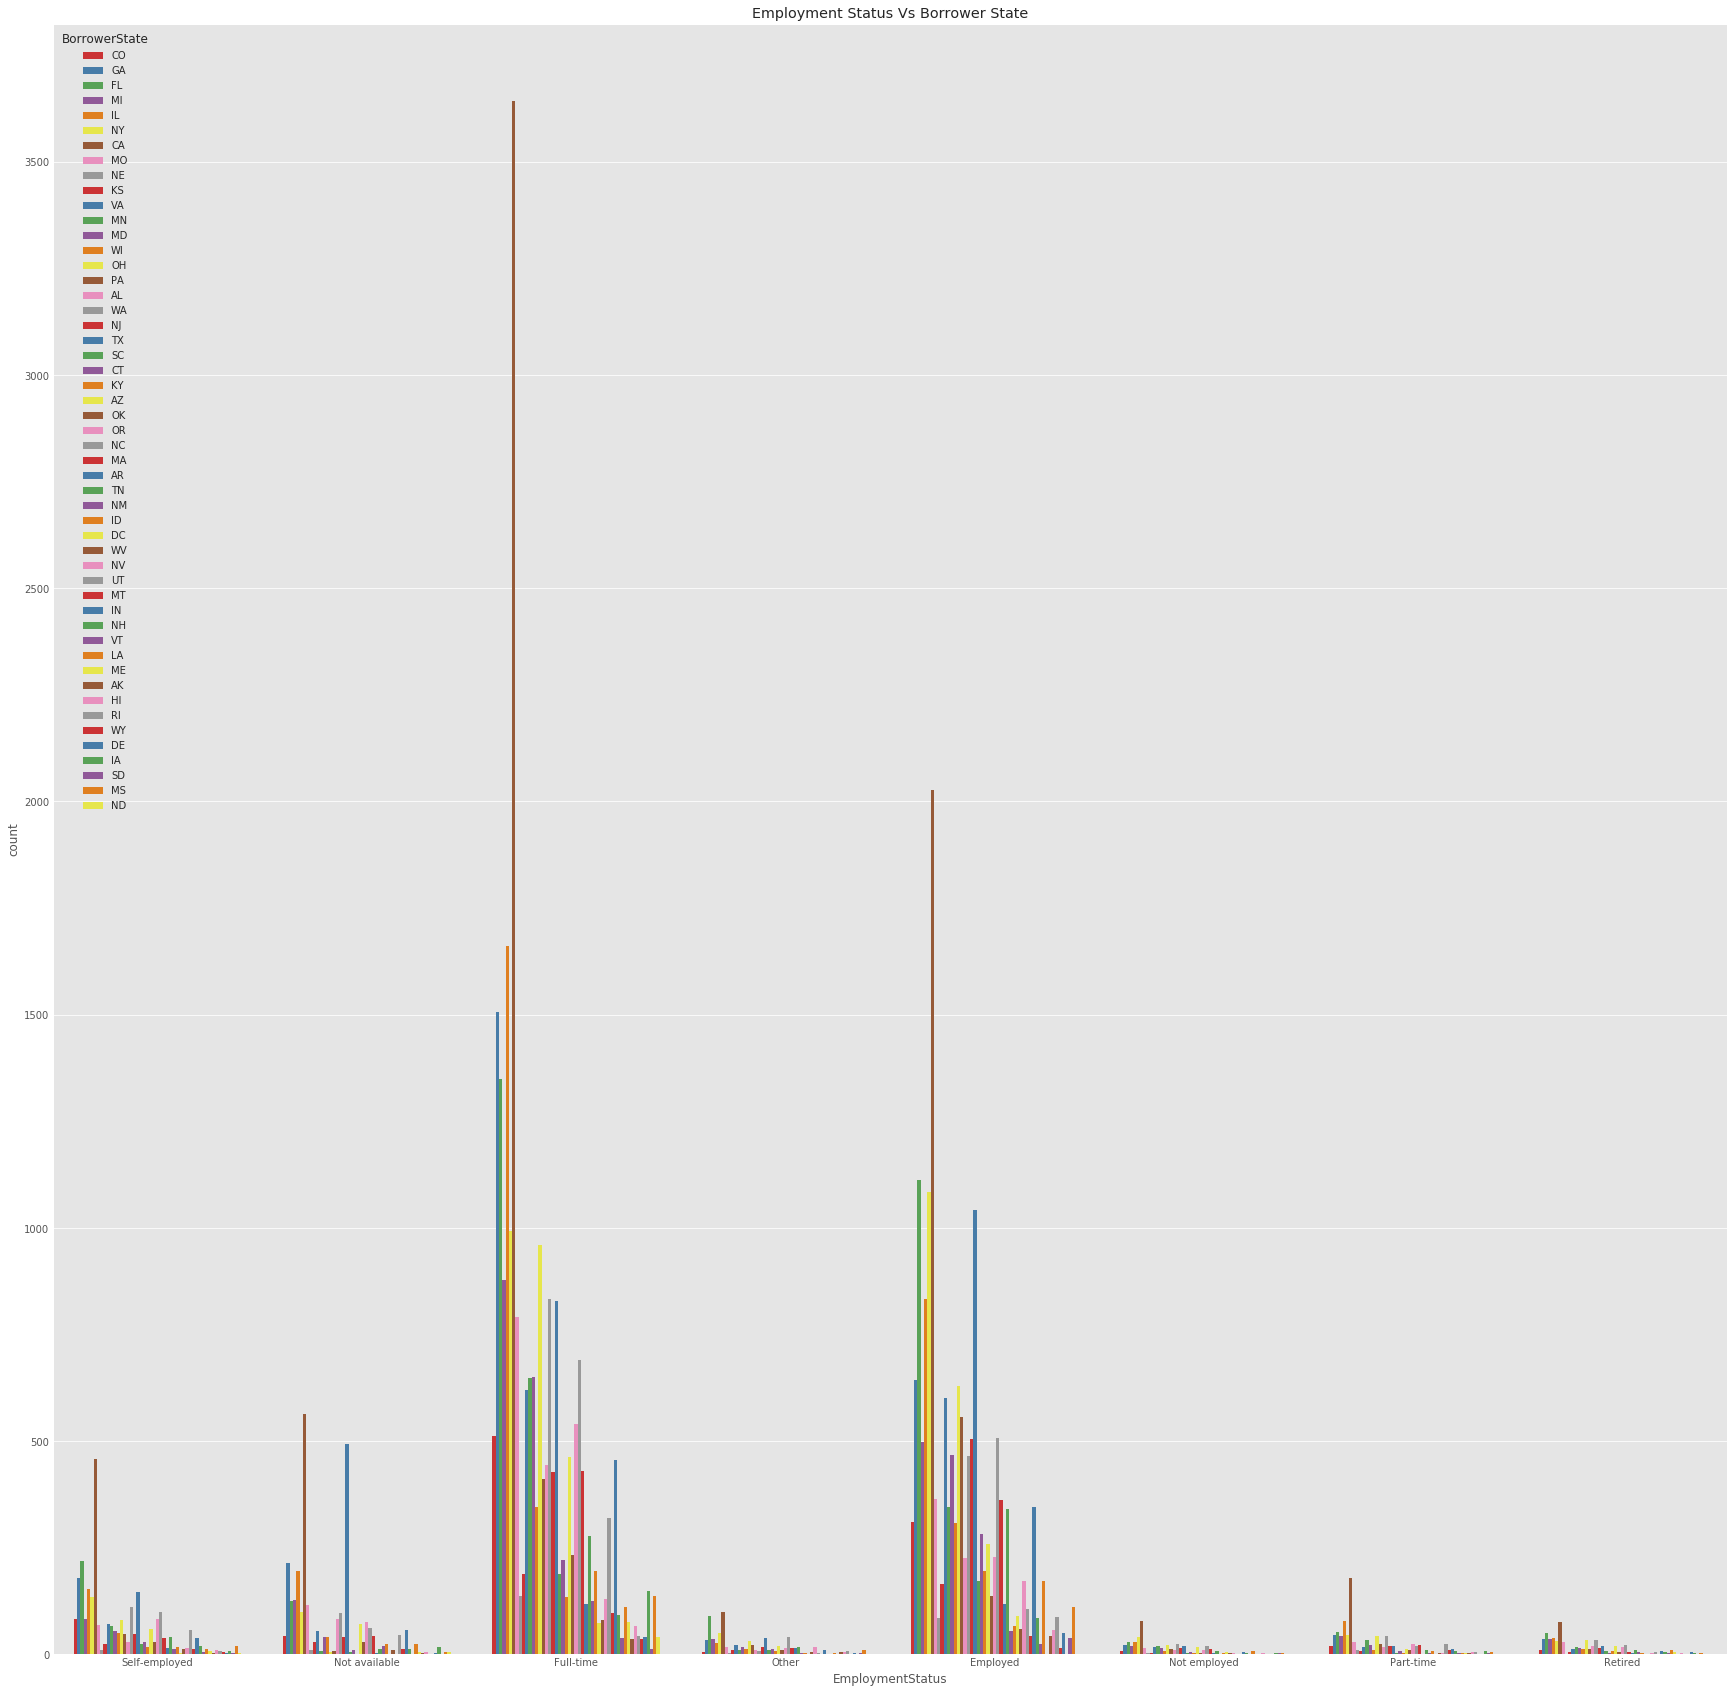

In [29]:
plt.figure(figsize = [30,30])
sb.countplot(data = loan_df, x = 'EmploymentStatus', hue = 'BorrowerState', palette = 'Set1');
plt.title('Employment Status Vs Borrower State');

In [30]:
loan_df.groupby('EmploymentStatus')['BorrowerState'].value_counts()

EmploymentStatus  BorrowerState
Employed          CA               2027
                  FL               1112
                  NY               1083
                  TX               1042
                  IL                833
                  GA                644
                  OH                630
                  VA                601
                  PA                556
                  NC                507
                  NJ                504
                  MI                497
                  MD                467
                  WA                465
                  MO                363
                  MA                362
                  IN                345
                  MN                345
                  TN                340
                  CO                311
                  WI                308
                  CT                281
                  AZ                259
                  OR                228
        

This plot shows that we have more employed borrowers in California

### What is the Relationship Between Employment Status and BorrowerRate?

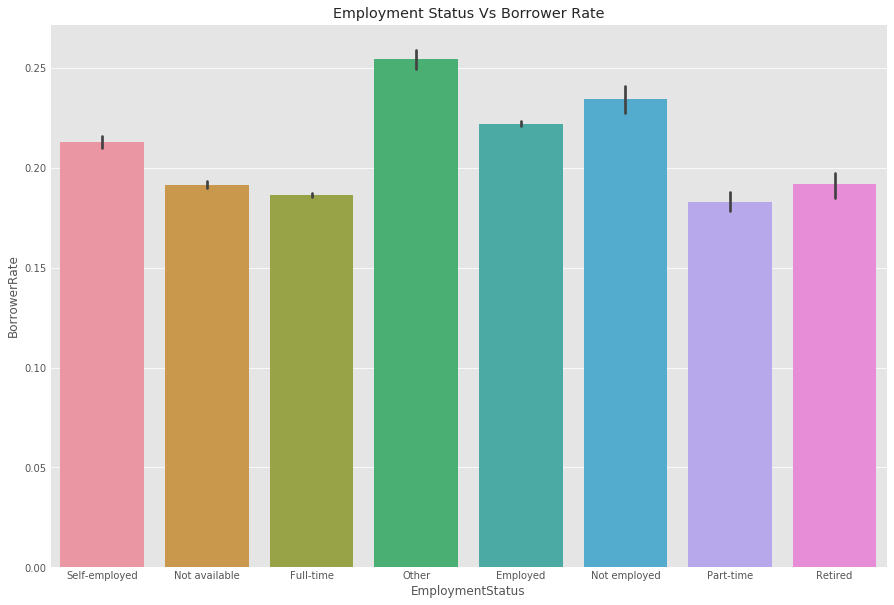

In [31]:
plt.figure(figsize = [15,10])
sb.barplot(data = loan_df, x = 'EmploymentStatus', y = 'BorrowerRate');
plt.title('Employment Status Vs Borrower Rate');

We can see that the highest borrower rate is Other and Not-employed borrowers

### What is the Relationship Between Borrower Rate and Borrower APR?

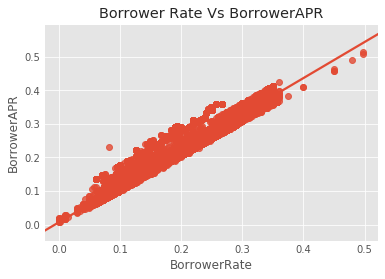

In [32]:
sb.regplot(data = loan_df, x = 'BorrowerRate', y = 'BorrowerAPR');
plt.title('Borrower Rate Vs BorrowerAPR');

We can see that Borrower APR is highly correlated with Borrower Rate, anytime borrower rate increases, borrower APR will also increase and vice-versa.

### What is the relatioship between Employment Status and Monthly Loan Payment?

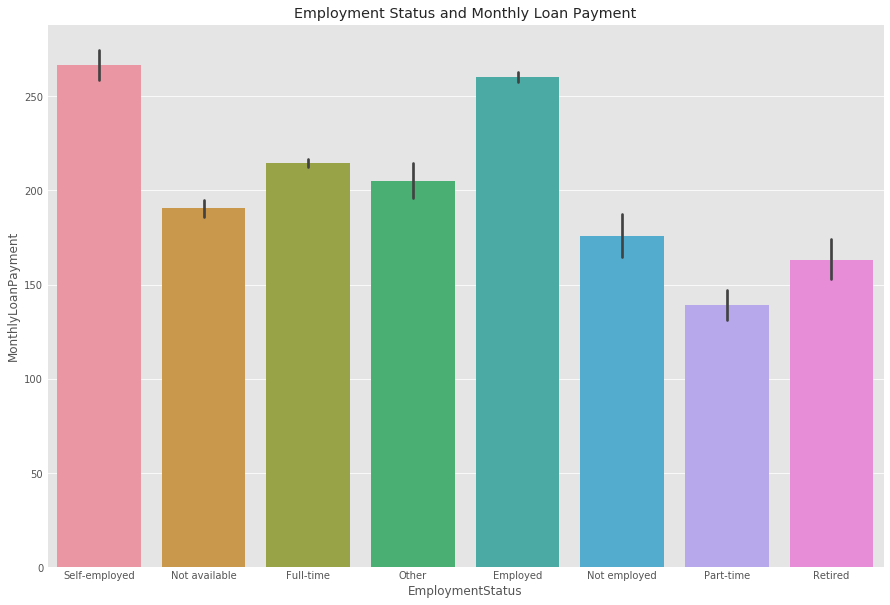

In [33]:
plt.figure(figsize = [15,10])
sb.barplot(data = loan_df, x = 'EmploymentStatus', y = 'MonthlyLoanPayment');
plt.title('Employment Status and Monthly Loan Payment');

We can see that the Part-time employed borrowers makes the lowest monthly loan payment and then followed by Retired workers

### What is the relationship between Monthly Loan Payment and Loan Original Amount?

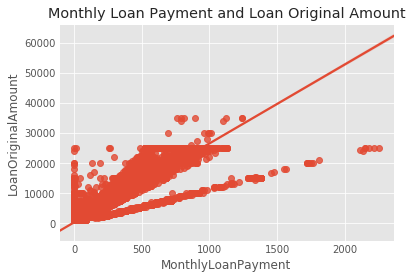

In [34]:
sb.regplot(data = loan_df, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount');
plt.title('Monthly Loan Payment and Loan Original Amount');

LoanOriginalAmount and MonthlyLoanPayment is having a strong positive relationship which states that the increase in the loan amount leads to the increase in monthly payment

### What is the relatioship between Employment Status and BorrowerAPR?

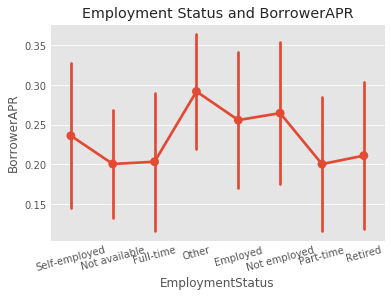

In [35]:
sb.pointplot(data = loan_df, x = 'EmploymentStatus', y = 'BorrowerAPR', ci = 'sd');
plt.xticks(rotation = 15);
plt.title('Employment Status and BorrowerAPR');

Highest borrower APR is Other, Not Employed and self-employed borrowers

### What is the relatioship between Employment Status and Stated Monthly Income?

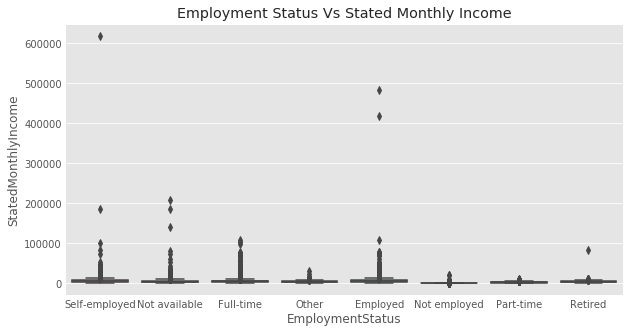

In [36]:
plt.figure(figsize = [10,5])
sb.boxplot(data = loan_df, x = 'EmploymentStatus', y = 'StatedMonthlyIncome');
plt.title('Employment Status Vs Stated Monthly Income');

We can see that the Self-Employed borrowers have the highest monthly income

### What is the relationship between Loan Original Amount and BorrowerAPR?

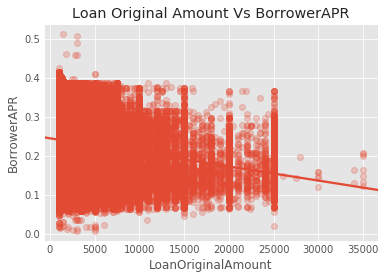

In [37]:
sb.regplot(data = loan_df, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.25}, x_jitter=0.3);
plt.title('Loan Original Amount Vs BorrowerAPR');

LoanOriginalAmount and BorrowerAPR is having a strong negative relationship

### What is the Relationship Between Loan Status and Listing Category?

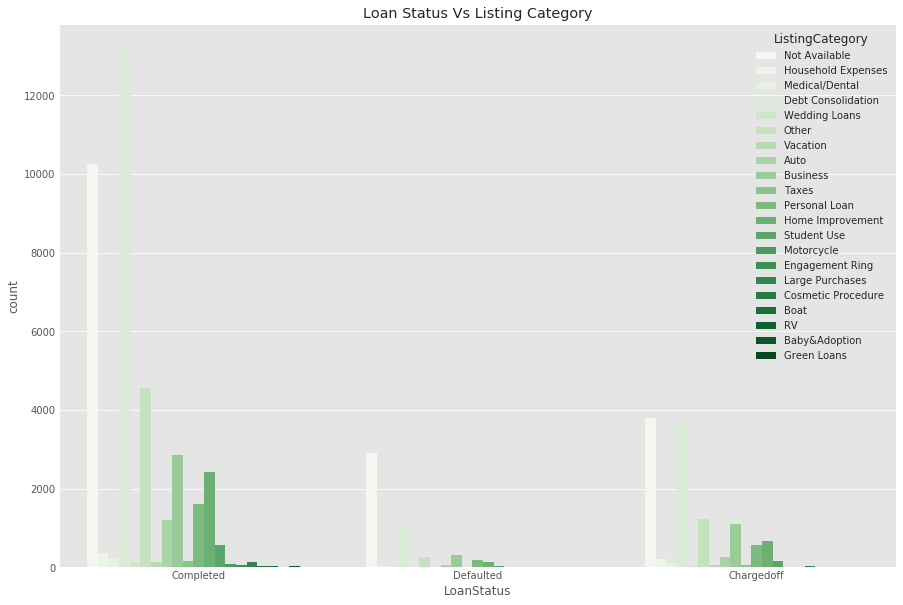

In [38]:
plt.figure(figsize = [15,10])
sb.countplot(data = loan_df, x = 'LoanStatus', hue = 'ListingCategory', palette = 'Greens');
plt.title('Loan Status Vs Listing Category');

In all of these Graphs the debt Consolidation have most frequency among all of them.

### What is the relationship between LoanStatus and Borrower Rate?

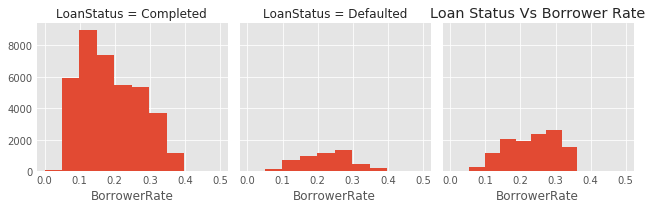

In [39]:
bins = np.arange(0.0 , 0.42 , 0.03)
g = sb.FacetGrid(data = loan_df , col = 'LoanStatus' , col_wrap =3)
g.map(plt.hist , 'BorrowerRate');
plt.title('Loan Status Vs Borrower Rate');

Highest borrower rate is for Completed Loans and followed by Chargedoff Loans.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 
* The Full time employed borrowers have a longer term loan of 36 months.
* The highest borrower rate is Other followed by Not-employed borrowers.
* The full time employed borrowers have almost completed their loans.
* In Loan status vs BorrowerRate, Completed Loans tend to be the highest, followed by Chargedoff Loans.
* Highest borrower APR is Other, Not Employed and self-employed borrowers.
* We have more employed borrowers in California
* The Self-Employed borrowers have the highest monthly income

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> 
*   LoanOriginalAmount and BorrowerAPR is having a strong negative relationship

*   LoanOriginalAmount and MonthlyLoanPayment is having a strong positive relationship

*   Borrower APR is highly correlated with Borrower Rate, if the BorrowerRate increases anytime borrower APR increases and vice-versa

## Multivariate Exploration

### What is the Relationship Between Employment Status, Loan Original Amount and Loan Status?

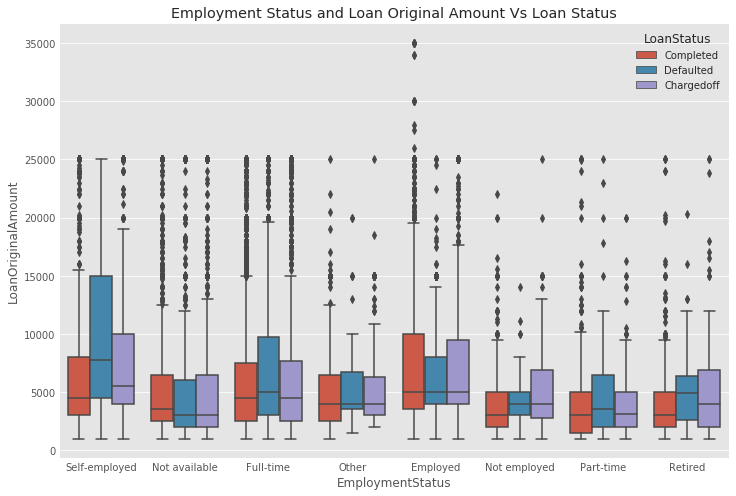

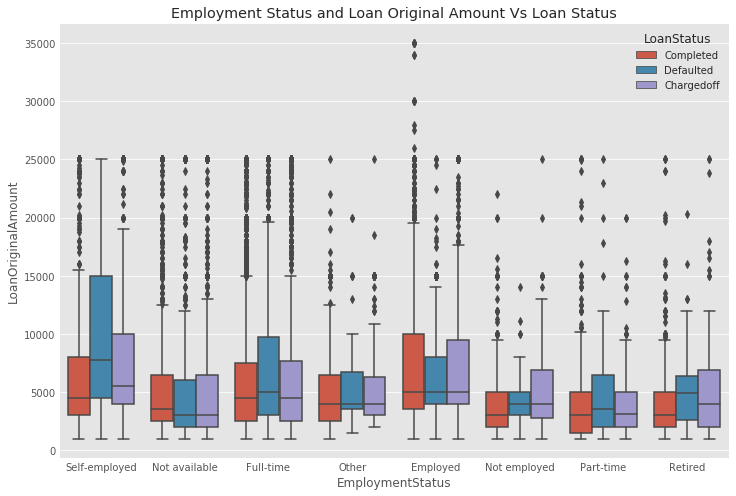

In [40]:
plt.figure(figsize = [12, 8])
sb.boxplot(data=loan_df, x='EmploymentStatus', y='LoanOriginalAmount', hue='LoanStatus');
plt.title('Employment Status and Loan Original Amount Vs Loan Status');

def boxplot_1(data, x,y,hue,title):
    plt.figure(figsize = [12, 8])
    sb.boxplot(data=data, x=x, y=y, hue=hue);
    plt.title(title);

boxplot_1(data=loan_df, x='EmploymentStatus', y='LoanOriginalAmount',
          hue='LoanStatus', title='Employment Status and Loan Original Amount Vs Loan Status')

Employed workers has the highest Completed Loan in the loan amount

### What is the relatioship between Employment Status, BorrowerAPR and Term?

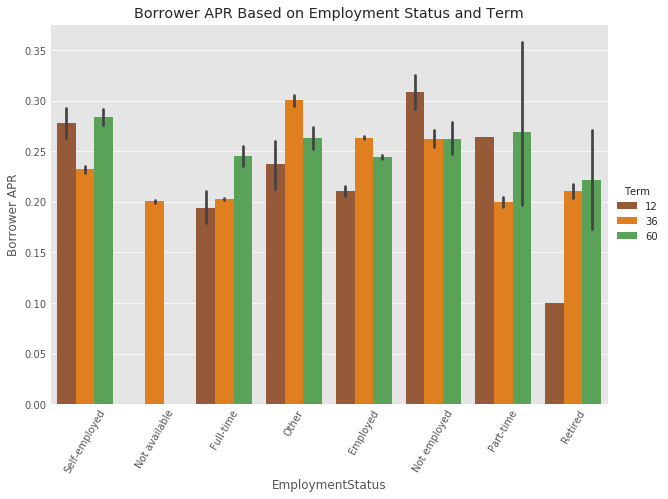

In [41]:
fig = plt.figure(figsize = [10,7])
ax = sb.barplot(data = loan_df, x = 'EmploymentStatus', y = 'BorrowerAPR',  hue = 'Term', palette = 'Set1_r')
plt.title('Borrower APR Based on Employment Status and Term')
plt.xlabel('EmploymentStatus')
plt.ylabel('Borrower APR')
plt.xticks(rotation = 60)
ax.legend(loc='center left', title='Term', bbox_to_anchor=(1, 0.5))
plt.show();

We can see that retired employees has the lowest borrower APR on a 12 month loan term

### What is the Relationship Between Employment Status, Borrower Rate and Term?

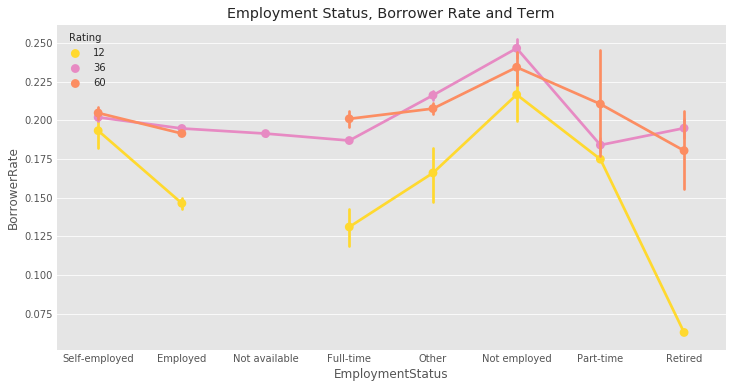

In [42]:
fig = plt.figure(figsize=[12,6])

ax = sb.pointplot(data=df, x='EmploymentStatus', y='BorrowerRate', hue='Term',
                   palette='Set2_r');
plt.legend(loc=2, title='Rating');
plt.title('Employment Status, Borrower Rate and Term');

We can see that the Not employed borrowers has the highest rate on a 36 loan term

### What is the Relationship Between Listing Category, BorrowerAPR and Term?

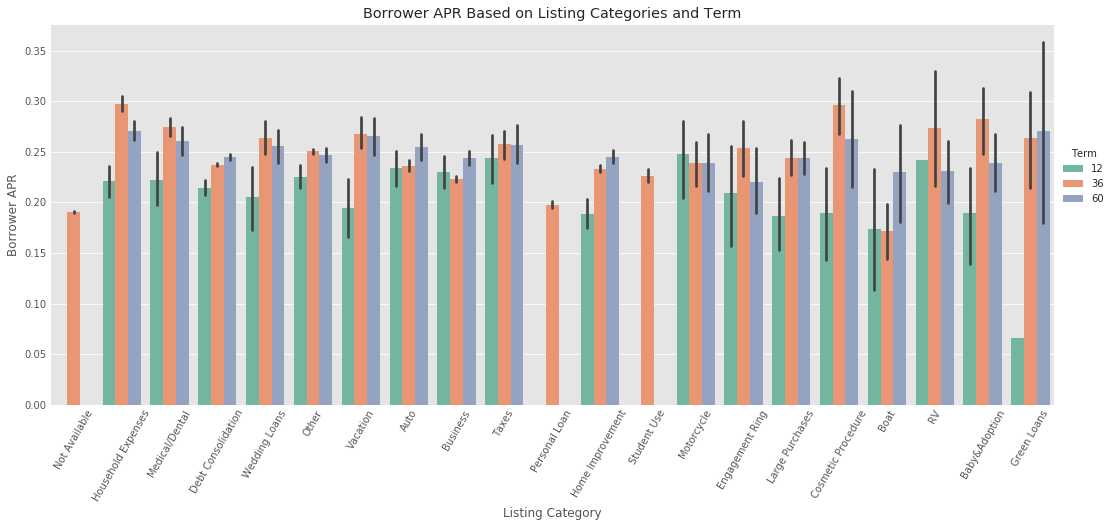

In [43]:
fig = plt.figure(figsize = [18,7])
ax = sb.barplot(data = loan_df, x = 'ListingCategory', y = 'BorrowerAPR',  hue = 'Term', palette = 'Set2')
plt.title('Borrower APR Based on Listing Categories and Term')
plt.xlabel('Listing Category')
plt.ylabel('Borrower APR')
plt.xticks(rotation = 60)
ax.legend(loc='center left', title='Term', bbox_to_anchor=(1, 0.6))
plt.show();

The lowest rate are for the 12 month term loan in Green Loans

### The relationship between Employment Status, Loan Original Amount and Stated Monthly Income

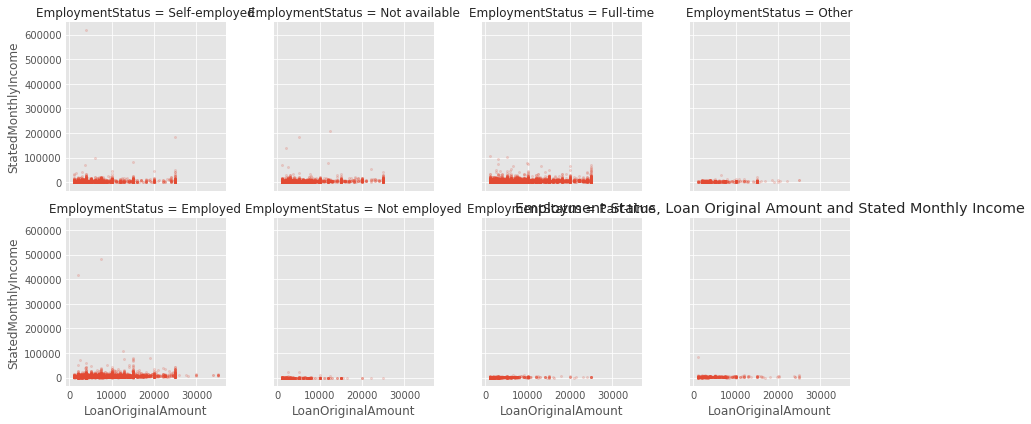

In [44]:
f = sb.FacetGrid(data=loan_df, col='EmploymentStatus', col_wrap=4)
f.map(plt.scatter, 'LoanOriginalAmount', 'StatedMonthlyIncome', alpha=0.2, s=5);
plt.title('Employment Status, Loan Original Amount and Stated Monthly Income');

There is a strong positive correlation between the Stated Monthly Income and Loan Original Amount in this employment status category, i.e borrowers with high monthly income can be loaned more money. If the monthly income increases, the loan amount increases and vice versa. While Self-employed borrowers is the highest.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Employed workers has the highest Completed Loan in the loan amount

Retired employees has the lowest borrower APR on a 12 month loan term

### Were there any interesting or surprising interactions between features?

There is a strong positive correlation between the Stated Monthly Income and Loan Original Amount in this employment status category, i.e borrowers with high monthly income can be loaned more money. If the monthly income increases, the loan amount increases and vice versa. While Self-employed borrowers is the highest

## Conclusions
>This was an interesting, challenging and confusing dataset with no directly or distinctly observable features with main variable of interest but a lot of implied relationships

In [45]:
# save the cleaned dataset for explanatory data analysis
loan_df.to_csv('Loan_cleaned.csv')

In [46]:
!jupyter nbconvert Part_I_exploration_template_Success.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_I_exploration_template_Success.ipynb to slides
[NbConvertApp] Writing 313533 bytes to Part_I_exploration_template_Success.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/opt/conda/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/opt/conda/lib/python3.6/site-packages/jupyter_core/application.py", line 266, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 337, in start
    self.convert_notebooks()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 507, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/opt/conda